# **Lección 1: Análisis Exploratorio de datos**
## Objetivo: Generar un dataset simulado y realizar una inspección inicial de sus variables.

In [729]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [730]:
#Generar variables base de dataset para poder analizar
np.random.seed(42)

n = 200

df = pd.DataFrame({
    "edad": np.random.randint(18, 65, n),
    "genero": np.random.choice(["F", "M", "Otro"], n),
    "visitas_web": np.random.randint(5, 50, n),
    "devoluciones": np.random.randint(0, 5, n),
    "reseña_score": np.random.randint(1, 6, n),
    "segmento_cliente": np.random.choice(["Nuevo", "Frecuente", "VIP"], n)
})


In [731]:
# Hacemos que la cantidad de compras sea dependiente de visitas_web
df["compras"] = (
    df["visitas_web"] * np.random.uniform(0.2, 0.5, n)
).astype(int)

# Generamos monto base dependiente de compras
df["monto_total"] = (
    df["compras"] * np.random.normal(4000, 500, n)
)

#  Ajustamos monto según segmento
multiplicador = {
    "Nuevo": 0.8,
    "Frecuente": 1.0,
    "VIP": 1.5
}

df["monto_total"] = df.apply(
    lambda row: row["monto_total"] * multiplicador[row["segmento_cliente"]],
    axis=1
)

# Restamos impacto de devoluciones
df["monto_total"] = df["monto_total"] - (df["devoluciones"] * 1000)

# Evitamos montos negativos (por seguridad)
df["monto_total"] = df["monto_total"].clip(lower=0)

df.head()


,edad,genero,visitas_web,devoluciones,reseña_score,segmento_cliente,compras,monto_total
0,56,M,26,1,3,VIP,7,42278.352629
1,46,Otro,29,0,1,VIP,10,66960.733325
2,32,M,26,1,3,Nuevo,12,36933.922076
3,60,Otro,26,2,4,Nuevo,9,26995.547991
4,25,F,46,1,4,Frecuente,19,85812.622031


## Inspección de variables
Identificamos variables cuantitativas y categóricas.

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              200 non-null    int32  
 1   genero            200 non-null    object 
 2   visitas_web       200 non-null    int32  
 3   devoluciones      200 non-null    int32  
 4   reseña_score      200 non-null    int32  
 5   segmento_cliente  200 non-null    object 
 6   compras           200 non-null    int64  
 7   monto_total       200 non-null    float64
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 9.5+ KB


## Detección de valores faltantes o inconsistencias (IDA)

In [733]:
df.isnull().sum()


edad                0
genero              0
visitas_web         0
devoluciones        0
reseña_score        0
segmento_cliente    0
compras             0
monto_total         0
dtype: int64

## Conclusión

El dataset contiene 200 registros sin valores faltantes.
Se identifican variables cuantitativas (edad, visitas_web, compras, monto_total, devoluciones, reseña_score y categóricas (género, segmento_cliente).
No se detectaron valores faltantes o inconsistencias.


# **Lección 2: Conceptos básicos de Estadística descriptiva**
## Objetivo: Analizar medidas de tendencia central, dispersión y distribución del monto total según el segmento del cliente.

In [734]:
df.describe()

,edad,visitas_web,devoluciones,reseña_score,compras,monto_total
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,41.570000,27.675000,2.040000,2.915000,9.340000,40202.428596
std,13.715527,12.456936,1.479644,1.416974,5.151416,27482.529316
min,18.000000,5.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,16.750000,1.000000,2.000000,5.000000,21359.546785
50%,42.000000,28.000000,2.000000,3.000000,9.000000,34254.116007
75%,54.000000,39.000000,3.000000,4.000000,13.000000,54874.321662
max,64.000000,49.000000,4.000000,5.000000,23.000000,187822.171260


**Calcular media, mediana, moda, varianza, desviación estándar**

In [735]:
# Medidas de tendencia central y dispersión por segmento
resumen_estadistico = df.groupby("segmento_cliente")["monto_total"].agg(
    media="mean",
    mediana="median",
    moda=lambda x: x.mode().iloc[0],
    rango=lambda x: x.max() - x.min(),
    varianza=lambda x: x.var(ddof=1),
    desv_std=lambda x: x.std(ddof=1)
)

resumen_estadistico.round(1)


,media,mediana,moda,rango,varianza,desv_std
segmento_cliente,,,,,,
Frecuente,37550.6,31741.1,0.0,86752.4,4.923492e+08,22188.9
Nuevo,28579.2,25800.8,2080.9,87106.8,3.175898e+08,17821.0
VIP,53486.5,51538.3,4029.2,183793.0,1.104164e+09,33229.0


In [736]:
# Medidas de tendencia central de reseña_score agrupado por segmento
resumen_reseña = df.groupby("segmento_cliente")["reseña_score"].agg(
    media="mean",
    mediana="median",
    moda=lambda x: x.mode().iloc[0]
)

resumen_reseña.round(1)

,media,mediana,moda
segmento_cliente,,,
Frecuente,3.0,3.0,4
Nuevo,2.9,3.0,2
VIP,2.9,3.0,3


**Determinar cuartiles y percentiles del monto total**

In [737]:
cuartiles = df["monto_total"].quantile([0.25, 0.5, 0.75])
cuartiles.round(2)

0.25    21359.55
0.50    34254.12
0.75    54874.32
Name: monto_total, dtype: float64

Hallazgos: 
-	El 25% de los clientes gasta menos de $21.359
-	El 50% de los clientes gasta menos de $34.254
-	El 75% gasta menos de $54.874
 
Esto indica que la mayor concentración de clientes está bajo los $54.000 aproximadamente.


In [738]:
percentiles = df["monto_total"].quantile([0.10, 0.25, 0.50, 0.75, 0.90])
percentiles.round(2)

0.10    10517.63
0.25    21359.55
0.50    34254.12
0.75    54874.32
0.90    70661.60
Name: monto_total, dtype: float64

Hallazgos: 
- Con respecto a los percentiles, el percentil 90 es igual a $70.661. Eso significa que solo el 10% de los clientes gasta más de $70.661.

**Generar histogramas y boxplots**

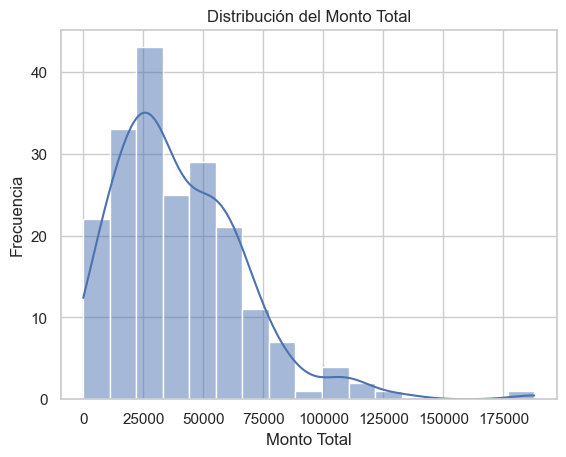

In [739]:
#Histograma general
plt.figure()
sns.histplot(df["monto_total"], kde=True)
plt.title("Distribución del Monto Total")
plt.xlabel("Monto Total")
plt.ylabel("Frecuencia")
plt.savefig("Histograma_monto_total.png", dpi=300, bbox_inches="tight")
plt.show()


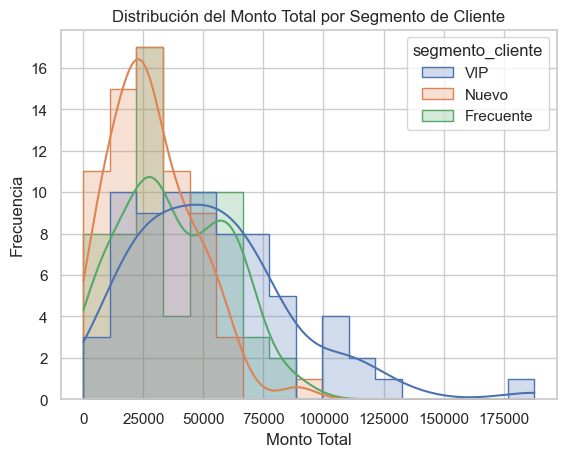

In [740]:
# Histograma por segmento
# Se agregó element="step" para evitar que se tapen las barras
plt.figure()
sns.histplot(data=df, x="monto_total", hue="segmento_cliente", kde=True, element="step")
plt.title("Distribución del Monto Total por Segmento de Cliente")
plt.xlabel("Monto Total")
plt.ylabel("Frecuencia")
plt.savefig("Histograma_monto_por_segmento.png", dpi=300, bbox_inches="tight")
plt.show()

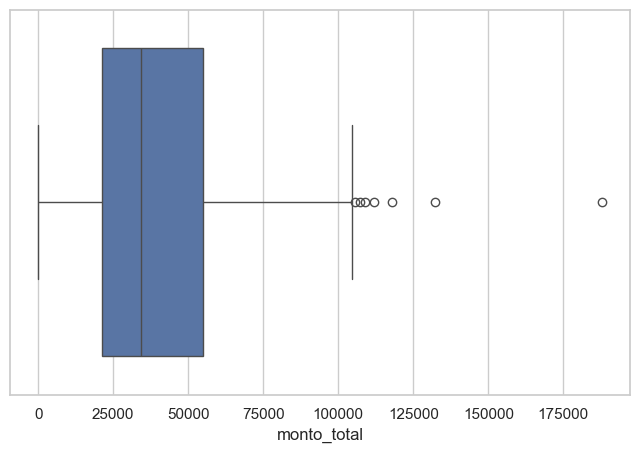

In [741]:
#Boxplot general
plt.figure(figsize=(8,5))
sns.boxplot(x=df["monto_total"])
plt.savefig("Boxplot_general.png", dpi=300, bbox_inches="tight")
plt.show()


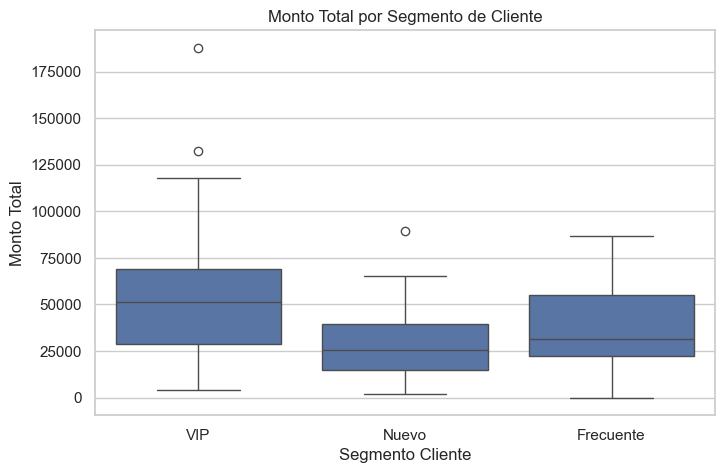

In [742]:
#Boxplot por segmento
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="segmento_cliente",
    y="monto_total"
)

plt.title("Monto Total por Segmento de Cliente")
plt.xlabel("Segmento Cliente")
plt.ylabel("Monto Total")
plt.savefig("Boxplot_segmento.png", dpi=300, bbox_inches="tight")
plt.show()

**Cálculo de valores atípicos generales**

In [743]:
Q1 = df["monto_total"].quantile(0.25)
Q3 = df["monto_total"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df["monto_total"] < lim_inf) | 
              (df["monto_total"] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("Outliers detectados (IQR):", outliers.shape[0])


Límite inferior: -28912.615530127467
Límite superior: 105146.48397658378
Outliers detectados (IQR): 7


In [744]:
#Cálculo de valores atípicos por segmento
def detectar_outliers(grupo):
    Q1 = grupo["monto_total"].quantile(0.25)
    Q3 = grupo["monto_total"].quantile(0.75)
    IQR = Q3 - Q1
    
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    return grupo[(grupo["monto_total"] < lim_inf) |
                 (grupo["monto_total"] > lim_sup)]

outliers_segmento = df.groupby("segmento_cliente", group_keys=False).apply(detectar_outliers)
outliers_segmento

C:\Users\carol\AppData\Local\Temp\ipykernel_10228\2596046100.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_segmento = df.groupby("segmento_cliente", group_keys=False).apply(detectar_outliers)


,edad,genero,visitas_web,devoluciones,reseña_score,segmento_cliente,compras,monto_total
82,62,F,49,3,1,Nuevo,23,89187.698066
151,54,Otro,45,1,1,VIP,20,132204.443739
195,49,Otro,48,1,3,VIP,23,187822.171260


In [745]:
outliers_segmento["segmento_cliente"].value_counts()


segmento_cliente
VIP      2
Nuevo    1
Name: count, dtype: int64

Hallazgos:
- Existen 3 transacciones con valores atípicos: 1 compra del segmento_cliente: "Nuevo" y 2 compras del segmento_cliente: "VIP".
- Dado que son sólo 3 casos de 200 registros generados en el dataset, y 2 de ellos son esperables ya que son compras mayores de clientes VIP se decidió mantenerlos.

# **Lección 3: Correlación**
## Objetivo: Detectar y cuantificar relaciones entre variables numéricas

In [746]:
#Verificamos las variables numéricas
df.dtypes

edad                  int32
genero               object
visitas_web           int32
devoluciones          int32
reseña_score          int32
segmento_cliente     object
compras               int64
monto_total         float64
dtype: object

**Construir scatterplots y matrices de relación**

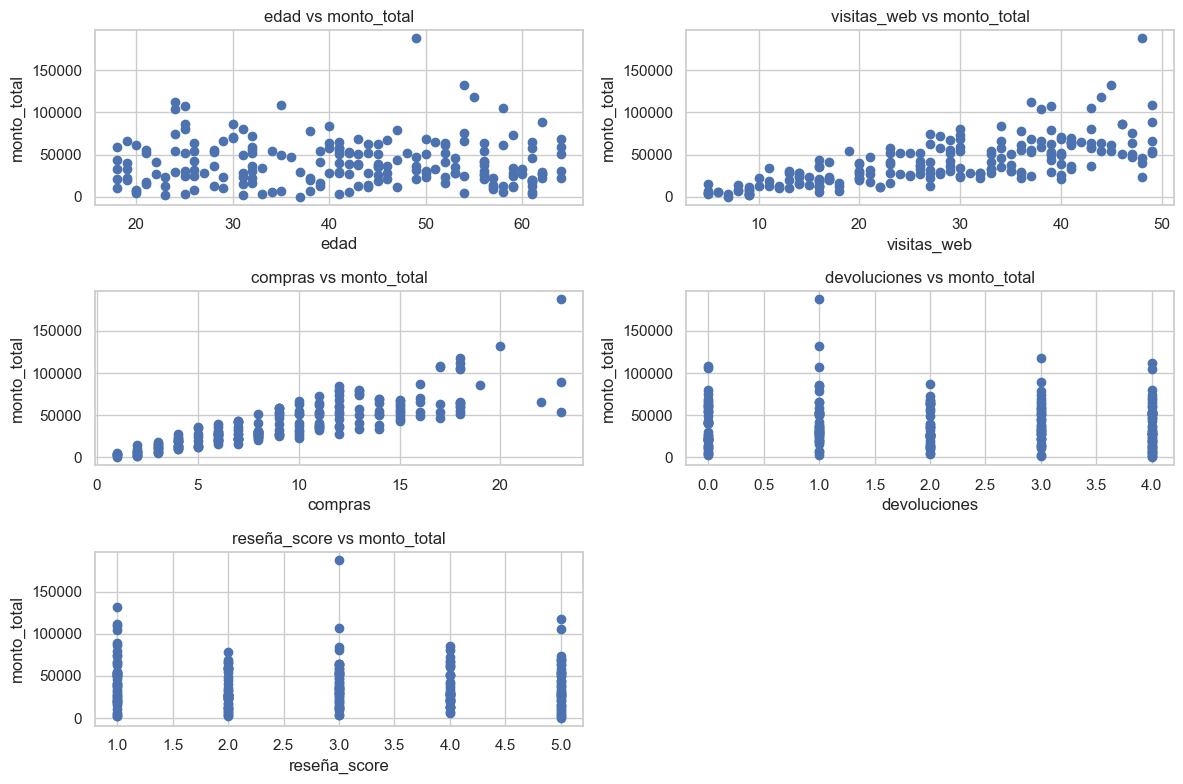

In [747]:
#Se comparan distintas variables con la variable "monto total"

variables = [
    "edad",
    "visitas_web",
    "compras",
    "devoluciones",
    "reseña_score"
]

plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[var], df["monto_total"])
    plt.xlabel(var)
    plt.ylabel("monto_total")
    plt.title(f"{var} vs monto_total")
    plt.grid(True)

plt.tight_layout()
plt.savefig("Scatterplot.png", dpi=300, bbox_inches="tight")
plt.show()


In [748]:
#Se realiza la matriz de correlación y se muestran los coeficientes de Pearson
corr = df.corr(numeric_only=True)
corr


,edad,visitas_web,devoluciones,reseña_score,compras,monto_total
edad,1.000000,0.028590,-0.092747,-0.049725,-0.009087,-0.014385
visitas_web,0.028590,1.000000,0.010524,-0.055664,0.860070,0.707412
devoluciones,-0.092747,0.010524,1.000000,-0.031925,0.045674,-0.043023
reseña_score,-0.049725,-0.055664,-0.031925,1.000000,-0.056603,-0.063340
compras,-0.009087,0.860070,0.045674,-0.056603,1.000000,0.836129
monto_total,-0.014385,0.707412,-0.043023,-0.063340,0.836129,1.000000


Hallazgos de correlaciones importantes:
- Tenemos una correlación fuerte de 0.86 entre compras y visitas_web, lo que tiene sentido ya que el módelo se construyó considerando compras = visitas_web * tasa_conversion, así tenemos que: "a mayor número de visitas al portal web, mayor número de compras".
- Tenemos una correlación fuerte de 0.836 entre compras y monto_total, tiene sentido porque el modelo se construyó considerando monto_total = compras * valor_unitario, así tenemos que: "a mayor cantidad de compras, mayor es el valor total del monto".
- Tenemos una correlación alta indirecta de 0.707 entre visitas_web y monto_total, tiene lógica porque la cantidad de visitas afecta la cantidad de compras lo que afecta el monto_total.
- No se observan relaciones espurias evidentes.


# **Lección 4: Regresiones Lineales**
## Implementar un modelo de regresión simple y múltiple para explicar variables dependientes.


**Ajuste Modelo de Regresión simple con statsmodels**

In [749]:
#Método de los mínimos cuadrados ordinarios (OLS)

# Variable independiente
X = df[["compras"]]

# Agregar constante (β0)
X = sm.add_constant(X)

# Variable dependiente
y = df["monto_total"]

# Ajustar modelo
modelo_simple = sm.OLS(y, X).fit()

print(modelo_simple.summary())


                            OLS Regression Results                            
Dep. Variable:            monto_total   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     460.1
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           1.56e-53
Time:                        22:29:09   Log-Likelihood:                -2207.4
No. Observations:                 200   AIC:                             4419.
Df Residuals:                     198   BIC:                             4425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1460.5559   2216.999     -0.659      0.5

**El módelo quedo así:
monto_total = -1460.56 + 4460.71 * compras**


- Interpretar coeficientes e inferencias básicas

intercepto(constante): -1460.56
p-value = 0.511 no es significativo(p > 0.05) y en este caso no tiene interpretación real, ya que cuando las compras son 0, el monto total igual deberia  ser cercano a 0.

**compras**
coef = 4460.71
p-value = 0.000 es muy significativo(p < 0.001), quiere decir que por cada compra adicional, el monto total aumenta en aproximadamente $4460.

Es un modelo fuerte, ya que el R-squared es 0.699, lo significa que: "El 69.9% de la variabilidad de monto_total es explicada por compras."

- Evaluar significancia de predictores

Compras es un predictor fuerte, el modelo está funcionando,  muestra relación positiva entre compras y monto_total.

**Calcular R², MSE, MAE**

In [750]:
# Predicciones del modelo
y_pred = modelo_simple.predict(X)

# Cálculo de métricas
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R²: 0.6991
MSE: 226121151.6812
RMSE: 15037.3253
MAE: 10893.2739


R² = 0.6991 , tenemos que el modelo explica el 69.91% de la variabilidad del monto_total.

MSE = 226121151.68 , es el Error al Cuadrático Medio. El número es grande porque: está en (monto_total$)²
penaliza fuertemente los errores grandes.

RMSE = 15037.32 es la Raíz del Error Cuadrático Medio indica que en promedio, el modelo se equivoca en ±15000 unidades monetarias.

MAE = 10893.27 es el Error Absoluto Medio indica que en promedio, el modelo comete un error absoluto de aproximadamente $10893, lo que representa un nivel de error un poco grande considerando que el gasto promedio observado es de $40202 si se consideran todos los segmentos de clientes.

**Visualizar la regresión con Seaborn**

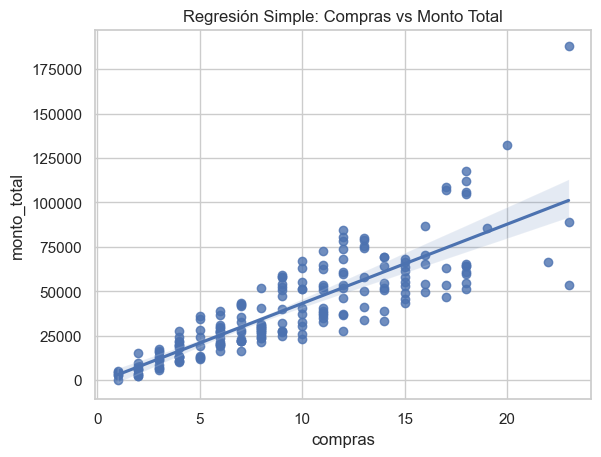

In [751]:
sns.regplot(x="compras", y="monto_total", data=df)
plt.title("Regresión Simple: Compras vs Monto Total")
plt.savefig("Regresión simple.png", dpi=300, bbox_inches="tight")
plt.show()


**Ajuste Modelo de Regresión múltiple con statsmodels**

In [752]:
X_multi = df[["compras", "visitas_web", "devoluciones"]]
X_multi = sm.add_constant(X_multi)

modelo_multiple = sm.OLS(y, X_multi).fit()

print(modelo_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:            monto_total   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     157.3
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           6.36e-52
Time:                        22:29:09   Log-Likelihood:                -2205.0
No. Observations:                 200   AIC:                             4418.
Df Residuals:                     196   BIC:                             4431.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2479.6635   2980.073      0.832   

-El módelo quedo así: monto_total = 2479.66 + 4729.54 * compras -119.54 *visitas_web -1540.57 *devoluciones

- Interpretar coeficientes e inferencias básicas

intercepto(constante): -2479.54
p-value = 0.406 no es significativo(p > 0.05) 

**compras**
coef = 4729.54
p = 0.000 es muy significativo(p < 0.001), quiere decir que por cada compra adicional, el monto total aumenta en promedio $4729, manteniendo constantes las otras variables.

**visitas_web**
coef = -119.55
p = 0.477 no es significativo(p > 0.05)  indica que no aporta información adicional una vez que ya conocemos compras, tiene lógica ya que las visitas web generan compras y las compras afectan el monto_total, entonces si ya estamos considerando compras en el módelo, visitas_web pierde utilidad.

**devoluciones**
coef = -1540.57
p = 0.034 es significativo(p < 0.05) indica que cada devolución reduce el monto total en promedio en $1540.

Es un modelo fuerte, ya que el R-squared es 0.706, lo significa que: "El 70.6% de la variabilidad de monto_total es explicada por compras, visitas_web y devoluciones."

- Evaluar significancia de predictores

El modelo está funcionando, indica que el gasto total está principalmente determinado por la cantidad de compras realizadas y, en menor medida por las devoluciones.

**Calcular R², MSE, MAE**

In [753]:
# Predicciones del modelo
predicciones = modelo_multiple.predict(X_multi)

# Cálculo de métricas
r2 = r2_score(y, predicciones)
mse = mean_squared_error(y, predicciones)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predicciones)
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.7065
MSE: 220581771.4126
RMSE: 14851.9955
MAE: 10782.8145


R² = 0.7065 , tenemos que El 70.65% del monto_total se explica por las variables: compras, visitas_web y devoluciones.

MSE = 220581771.4126 , es el Error al Cuadrático Medio. Se usa principalmente para comparar modelos, es más bajo que con regresión simple. Este modelo con Regresión múltiple es mejor.

RMSE = 14852 es la Raíz del Error Cuadrático Medio indica que en promedio, el modelo se equivoca en ±$14852.

MAE = 10783 es el Error Absoluto Medio indica que en promedio, el modelo comete un error absoluto de aproximadamente $10783, sigue siendo un nivel de error un poco grande considerando que el gasto promedio observado es de $40202 si se consideran todos los segmentos de clientes.

# **Lección 5: Análisis Visual de Datos**
##  Representar relaciones complejas y distribuciones mediante Seaborn.


**Crear gráficos de tipo pairplot, violinplot, jointplot y heatmap**

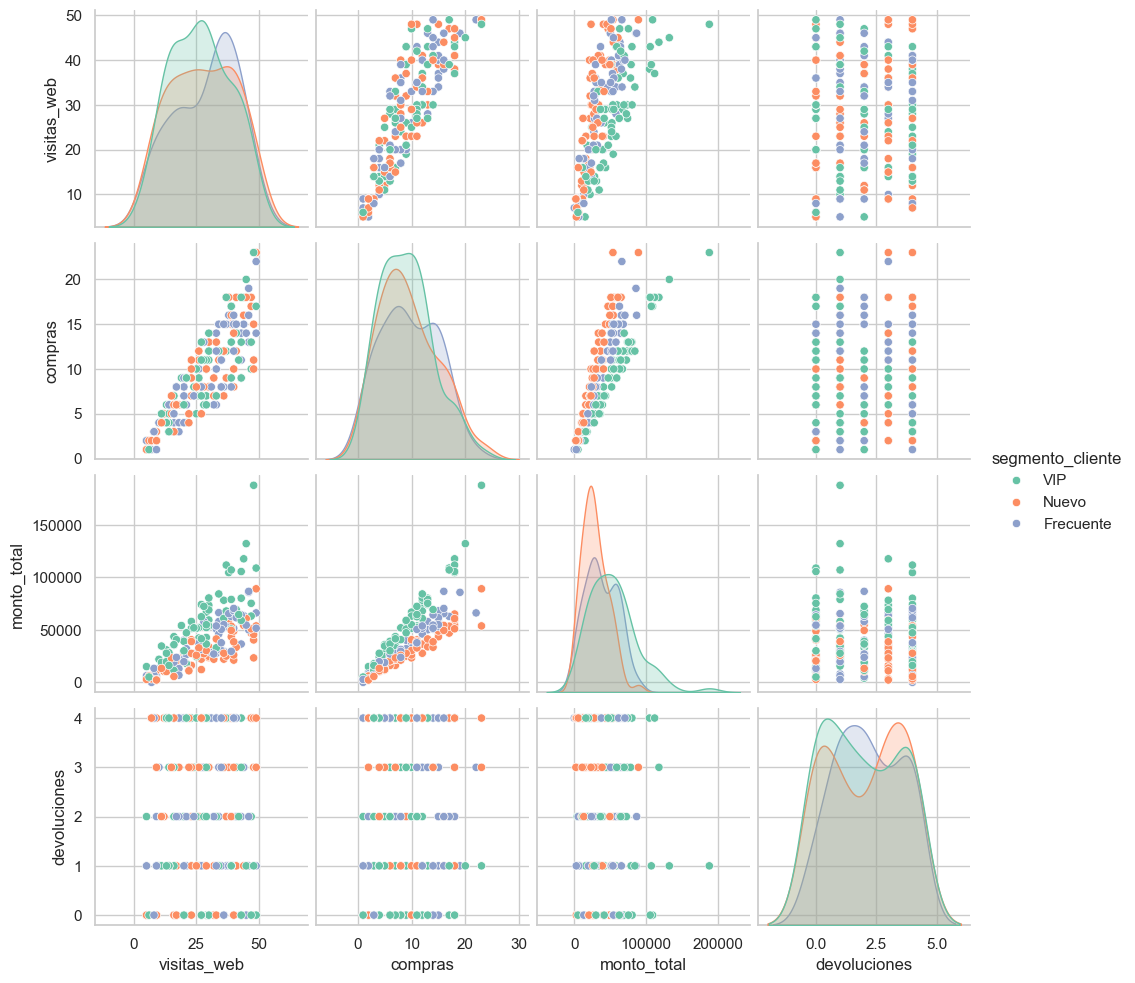

In [754]:
#Pairplot (relaciones entre múltiples variables)
sns.pairplot(
    df,
    vars=["visitas_web", "compras", "monto_total", "devoluciones"],
    hue="segmento_cliente",
    diag_kind="kde",
    palette="Set2"
)
plt.savefig("Pairplot.png", dpi=300, bbox_inches="tight")
plt.show()


Se observa una fuerte relación positiva entre visitas_web, compras y monto_total. Los clientes del segmento VIP tienden a concentrarse en los niveles más altos de gasto, confirmando su alto valor comercial.

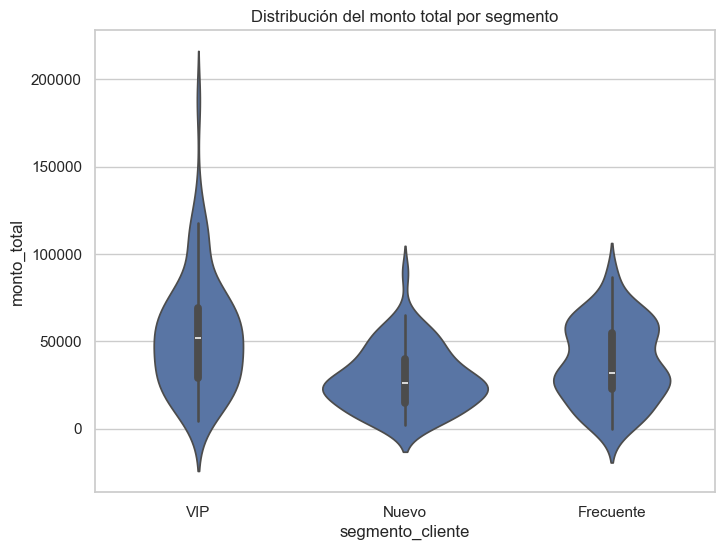

In [755]:
#Violinplot (distribución por segmento)
plt.figure(figsize=(8,6))

sns.set_theme(style="whitegrid")
sns.violinplot(
    x="segmento_cliente",
    y="monto_total",
    data=df
)

plt.title("Distribución del monto total por segmento")
plt.savefig("Violinplot.png", dpi=300, bbox_inches="tight")
plt.show()


El segmento VIP presenta montos totales más altos y mayor dispersión, indicando que estos clientes generan mayor valor económico para la empresa.

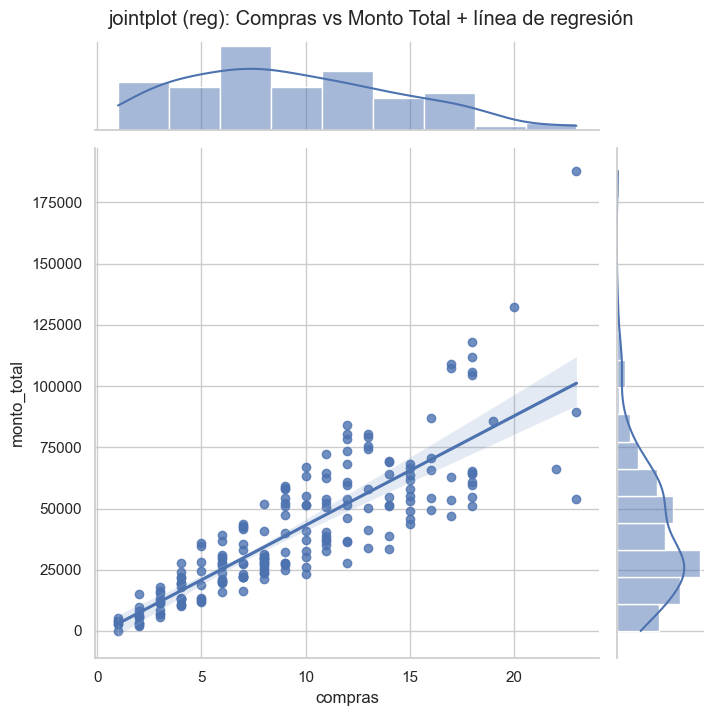

In [756]:
#Jointplot (relación entre dos variables clave)
sns.jointplot(
    x="compras",
    y="monto_total",
    data=df,
    kind="reg",
    height=7
)

plt.suptitle("jointplot (reg): Compras vs Monto Total + línea de regresión", y=1.02)
plt.savefig("Jointplot.png", dpi=300, bbox_inches="tight")
plt.show()


Existe una relación lineal positiva clara entre compras y monto_total, confirmando que el aumento en la cantidad de compras incrementa el ingreso generado por cliente.

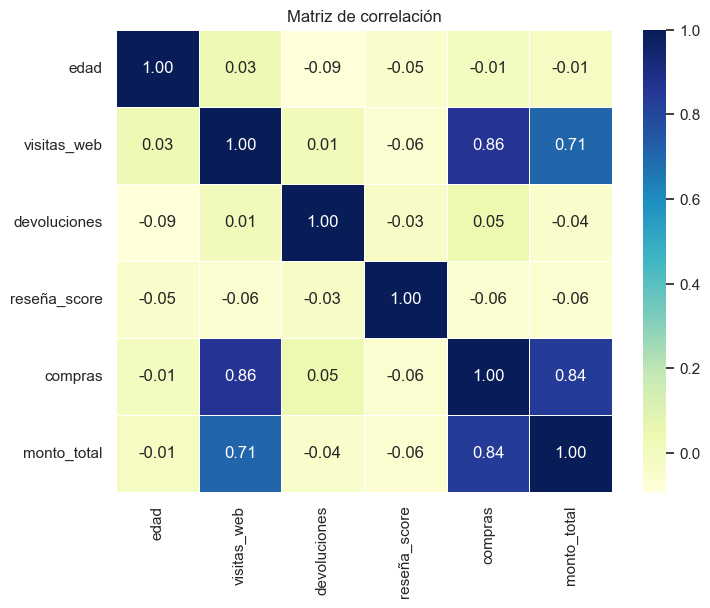

In [757]:
#Heatmap de correlación

plt.figure(figsize=(8,6))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Matriz de correlación")
plt.savefig("Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


Existe una fuerte correlación positiva entre compras y monto_total (r ≈ 0.84), indicando que el gasto depende directamente del número de compras realizadas.

**Utilizar FacetGrid para segmentar por categorías**

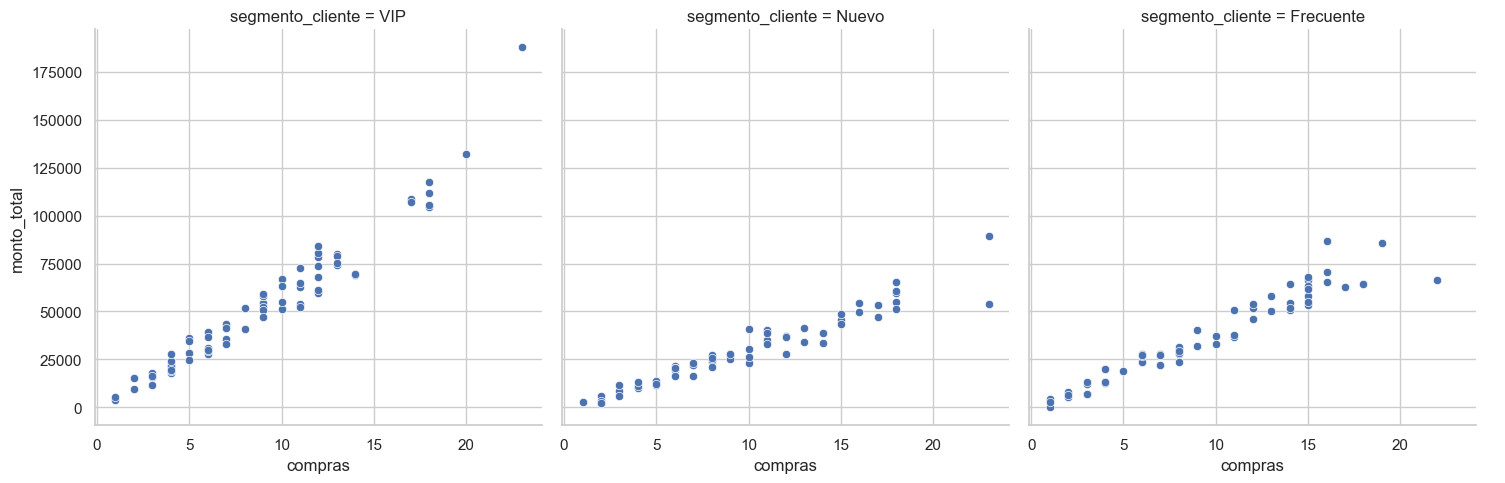

In [758]:
g = sns.FacetGrid(df, col="segmento_cliente", height=5)

g.map(sns.scatterplot, "compras", "monto_total")

g.add_legend()
plt.savefig("FacetGrid.png", dpi=300, bbox_inches="tight")
plt.show()


Los clientes VIP muestran niveles consistentemente más altos de gasto para una misma cantidad de compras, lo que indica un mayor valor promedio por transacción.

# **Lección 6: Librería Matplotlib**
##  Crear visualizaciones personalizadas y exportables.

**Crear figuras y subplots**

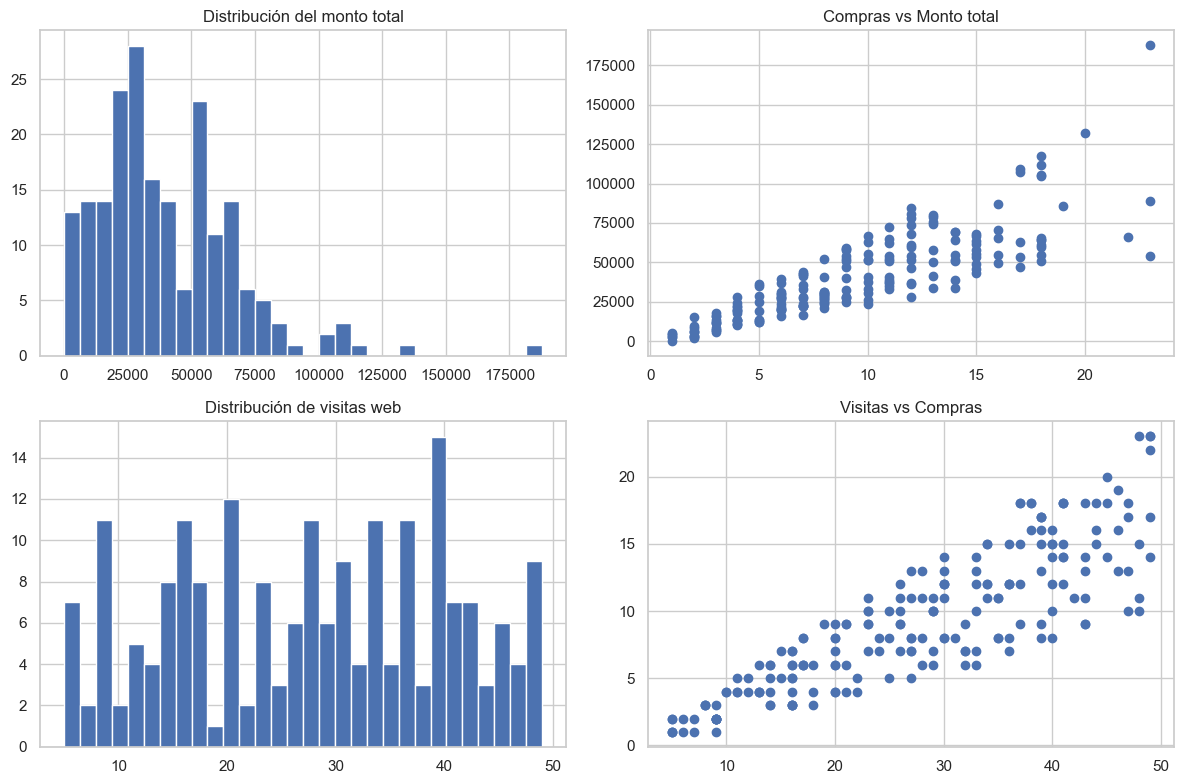

In [759]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1
axes[0,0].hist(df["monto_total"], bins=30)
axes[0,0].set_title("Distribución del monto total")

# Gráfico 2
axes[0,1].scatter(df["compras"], df["monto_total"])
axes[0,1].set_title("Compras vs Monto total")

# Gráfico 3
axes[1,0].hist(df["visitas_web"], bins=30)
axes[1,0].set_title("Distribución de visitas web")

# Gráfico 4
axes[1,1].scatter(df["visitas_web"], df["compras"])
axes[1,1].set_title("Visitas vs Compras")

plt.tight_layout()
plt.savefig("Subplots.png", dpi=300, bbox_inches="tight")
plt.show()


**Personalizar títulos, etiquetas y leyendas**

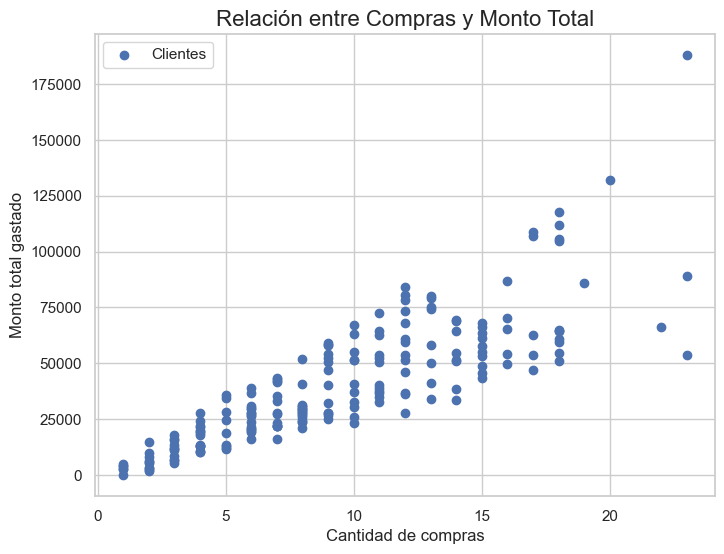

In [760]:
plt.figure(figsize=(8,6))

plt.scatter(df["compras"], df["monto_total"], label="Clientes")

plt.title("Relación entre Compras y Monto Total", fontsize=16)

plt.xlabel("Cantidad de compras", fontsize=12)

plt.ylabel("Monto total gastado", fontsize=12)

plt.legend()

plt.grid(True)
plt.savefig("Gráfico con leyenda.png", dpi=300, bbox_inches="tight")
plt.show()


**Usar anotaciones,límites y formatos de archivos**

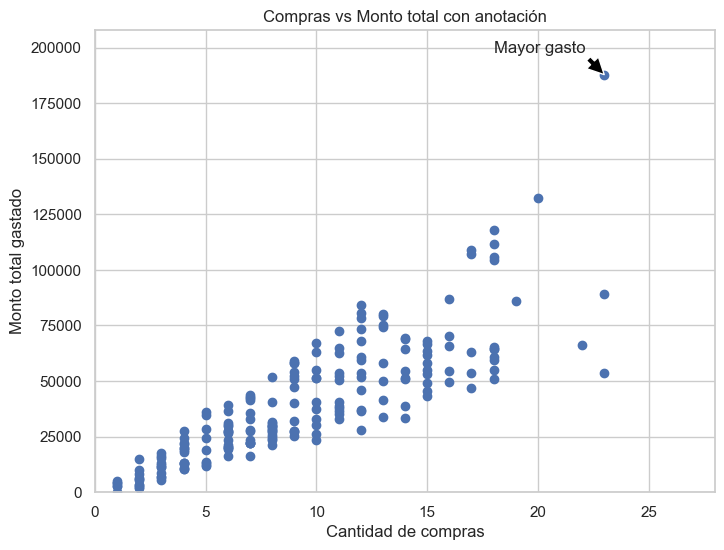

In [761]:
plt.figure(figsize=(8,6))

plt.scatter(df["compras"], df["monto_total"])
plt.xlabel("Cantidad de compras", fontsize=12)
plt.ylabel("Monto total gastado", fontsize=12)
plt.xlim(0, df["compras"].max()+5)
plt.ylim(0, df["monto_total"].max()+20000)

# anotación
plt.annotate(
    "Mayor gasto",
    xy=(df["compras"].max(), df["monto_total"].max()),
    xytext=(df["compras"].max()-5, df["monto_total"].max()+10000),
    arrowprops=dict(facecolor="black")
)

plt.title("Compras vs Monto total con anotación")
plt.savefig("Gráfico con anotaciones y límites.png", dpi=300, bbox_inches="tight")
plt.show()


**Gráfico mejorado**

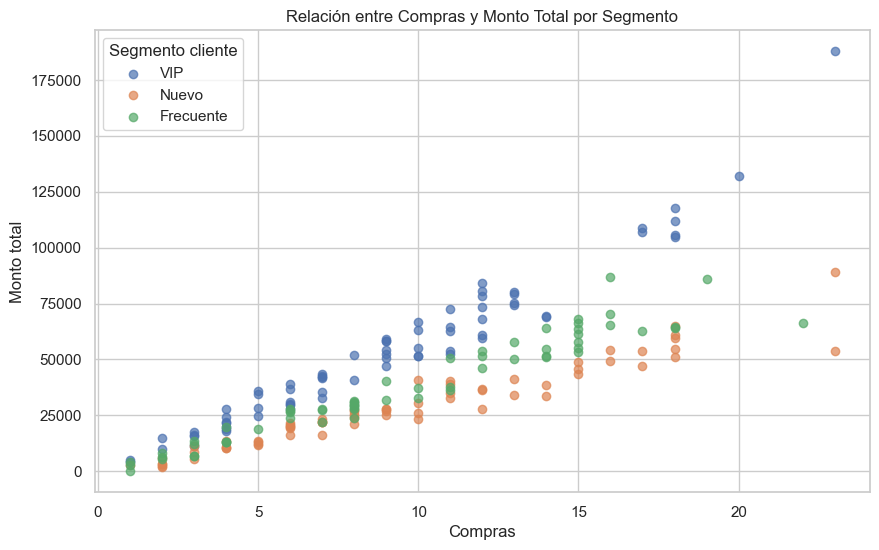

In [762]:
plt.figure(figsize=(10,6))

for segmento in df["segmento_cliente"].unique():
    
    subset = df[df["segmento_cliente"] == segmento]
    
    plt.scatter(
        subset["compras"],
        subset["monto_total"],
        label=segmento,
        alpha=0.7
    )

plt.title("Relación entre Compras y Monto Total por Segmento")

plt.xlabel("Compras")

plt.ylabel("Monto total")

plt.legend(title="Segmento cliente")

plt.grid(True)

plt.savefig("grafico_final_segmentos.png", dpi=300)

plt.show()


**Conclusiones finales:** 
El modelo presentado nos indica que el monto total es explicado principalmente por la variable cantidad de compras y que la cantidad de visitas al sitio web afectan la cantidad de compras realizadas.
Además, los clientes VIP tienen mayor gasto total.

Tanto el Modelo de Regresión lineal como el Módelo de Regresión Múltiple tienen un error MAE aprox. de $11000, lo cual se considera grande dado que el gasto promedio observado es de $40202. El modelo podría ser más representativo si se considerarán más transaciones,  en este caso fueron solo 200.